# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.002
-0.001
-0.002
-0.002
-0.002
0.0
-0.001
-0.003
-0.002
0.988
0.99
0.992
0.99
0.99
1.982
1.984
1.985
1.984
1.984
2.98
2.983
2.984
2.984
2.985
2.985
3.984
3.985
3.984
3.984
4.982
4.985
4.986
4.984
4.984
5.989
5.989
5.988
5.989
6.686
6.688
6.689
6.688
6.689
7.414
7.416
7.418
7.417
7.418
8.423
8.423
8.422
8.421
9.427
9.427
9.426
9.425
10.423
10.427
10.427
10.426
10.427
10.427
11.431
11.43
11.43
12.433
12.433
12.431
12.431
13.437
13.436
13.436
13.438
14.177
14.182
14.182
14.18
14.181
14.92
14.921
14.924
14.924
14.924
15.925
15.925
15.923
15.922
16.922
16.922
16.922
16.922
17.918
17.918
17.917
17.916
18.911
18.911
18.911
18.91
18.91
19.903
19.903
19.901
19.901
20.902
20.901
20.901
20.901
21.764
21.763
21.762
21.763
22.64
22.64
22.639
22.639
23.639
23.639
23.639
23.639
24.634
24.634
24.632
24.632
25.629
25.629
25.627
25.626
26.626
26.626
26.624
26.624
27.626
27.626
27.623
27.623
28.618
28.618
28.616
28.617

57.409
57.409
57.408
57.408
57.408
57.408
57.408
57.408
57.408
57.408
57.408
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.407
57.406
57.406
57.406
57.404
57.404
57.403
57.403
57.483
57.483
57.483
57.483
57.551
57.551
57.551
57.551
57.55
57.55
57.55
57.604
57.604
57.603
57.603
57.606
57.606
57.604
57.604
57.603
57.603
57.603
57.603
57.603
57.603
57.603
57.603
57.602
57.602
57.602
57.602
57.602
57.601
57.6
57.6
57.599
57.599
57.599
57.599
57.6
57.6
57.6
57.6
57.6
57.6
57.6
57.6
57.6
57.6
57.599
57.599
57.598
57.793
57.793
57.793
57.793
57.792
57.792
57.792
57.791
57.791
57.791
57.79
57.79
57.789
57.789
57.789
57.789
57.789
57.788
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.787
57.786
57.785
57.785
57.784
57.784
57.901
57.958
57.958
57.958
57.958
57.958
57.958
57.958
57.958
57.958
58.045
58.045
58.044
58.044
58.043
58.043
58.042
58.042
58.042
58.04
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1507,3014,60.937
1508,3016,60.938
1509,3018,60.938
1510,3020,60.938


<IPython.core.display.Javascript object>


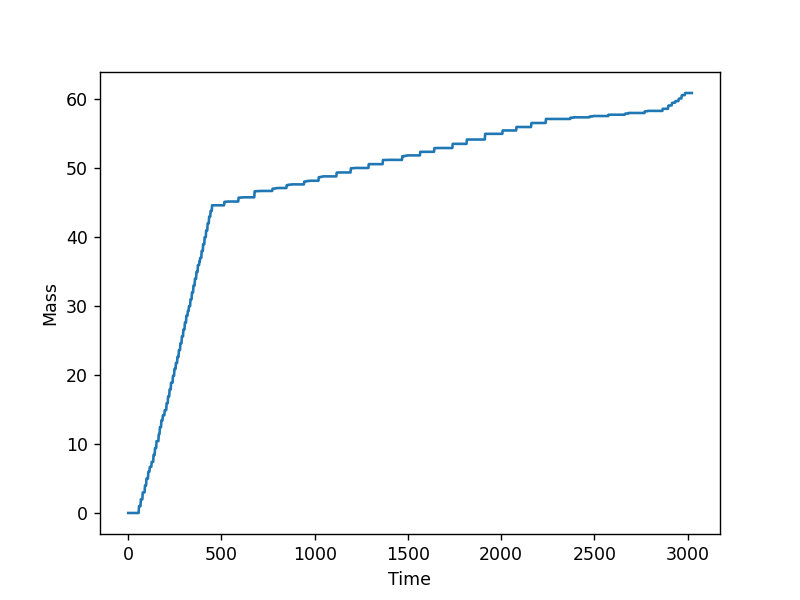

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_150523_S445-450.csv')